# Exploratory Data Analysis

## Set Up

In [1]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


## EDA 

In [2]:
#data=pd.read_parquet('prearedData.parquet',engine='pyarrow')
data=pd.read_csv('prearedData.csv', index_col=0)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31736 entries, 13 to 31748
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   manufacturer            31736 non-null  object 
 1   model                   31736 non-null  object 
 2   year                    31736 non-null  object 
 3   version                 31736 non-null  object 
 4   power(kW)               31734 non-null  float64
 5   fuel_date               31736 non-null  object 
 6   odometer                23452 non-null  float64
 7   trip_distance(km)       31734 non-null  float64
 8   quantity(kWh)           31734 non-null  float64
 9   fuel_type               31736 non-null  object 
 10  tire_type               31646 non-null  object 
 11  city                    31734 non-null  float64
 12  motor_way               31734 non-null  float64
 13  country_roads           31734 non-null  float64
 14  driving_style           31625 non-nul

In [4]:
data.head()

,manufacturer,model,year,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),fuel_type,...,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note,user_id
13,Volkswagen,Golf,2018,e-Golf,100.0,14.01.2022,NaN,59.0,6.0,Electricity,...,1.0,0.0,Normal,17.0,1.0,0.0,NaN,4.1,NaN,Tesla_Model_S_2015
14,Volkswagen,Golf,2018,e-Golf,100.0,13.01.2022,NaN,59.0,23.0,Electricity,...,1.0,0.0,Normal,17.0,1.0,0.0,NaN,4.1,NaN,Tesla_Model_S_2015
15,Volkswagen,Golf,2018,e-Golf,100.0,13.01.2022,NaN,49.0,7.0,Electricity,...,1.0,0.0,Normal,17.0,1.0,0.0,NaN,4.1,NaN,Tesla_Model_S_2015
16,Volkswagen,Golf,2018,e-Golf,100.0,13.01.2022,NaN,71.0,4.0,Electricity,...,1.0,0.0,Normal,17.0,1.0,0.0,NaN,4.1,NaN,Tesla_Model_S_2015
17,Volkswagen,Golf,2018,e-Golf,100.0,12.01.2022,NaN,59.0,20.0,Electricity,...,1.0,0.0,Normal,17.0,1.0,0.0,NaN,4.1,NaN,Tesla_Model_S_2015


In [3]:
categorical=['fuel_type','tire_type', 'city','motor_way','country_roads','driving_style','A/C','park_heating']
def convert_to_categoricals(columns, df):
    for col in columns:
        df[col]=df[col].astype('object')
        
colums_for_num_cov=['power(kW)','quantity(kWh)','consumption(kWh/100km)','trip_distance(km)','ecr_deviation','odometer']
convert_to_categoricals(categorical, data) 

## Segregate Columns

In [37]:
data.columns

Index(['manufacturer', 'model', 'year', 'version', 'power(kW)', 'fuel_date',
       'odometer', 'trip_distance(km)', 'quantity(kWh)', 'fuel_type',
       'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
       'consumption(kWh/100km)', 'A/C', 'park_heating', 'avg_speed(km/h)',
       'ecr_deviation', 'fuel_note', 'user_id'],
      dtype='object')

In [4]:
numeric_cols=['power(kW)','odometer','quantity(kWh)','consumption(kWh/100km)','ecr_deviation','trip_distance(km)',]

In [13]:
numeric_cols=data
numeric_cols

,manufacturer,model,year,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),fuel_type,...,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note,user_id
13,Volkswagen,Golf,2018,e-Golf,100.0,14.01.2022,NaN,59.0,6.0,Electricity,...,1.0,0.0,Normal,17.00,1.0,0.0,NaN,4.10,NaN,Tesla_Model_S_2015
14,Volkswagen,Golf,2018,e-Golf,100.0,13.01.2022,NaN,59.0,23.0,Electricity,...,1.0,0.0,Normal,17.00,1.0,0.0,NaN,4.10,NaN,Tesla_Model_S_2015
15,Volkswagen,Golf,2018,e-Golf,100.0,13.01.2022,NaN,49.0,7.0,Electricity,...,1.0,0.0,Normal,17.00,1.0,0.0,NaN,4.10,NaN,Tesla_Model_S_2015
16,Volkswagen,Golf,2018,e-Golf,100.0,13.01.2022,NaN,71.0,4.0,Electricity,...,1.0,0.0,Normal,17.00,1.0,0.0,NaN,4.10,NaN,Tesla_Model_S_2015
17,Volkswagen,Golf,2018,e-Golf,100.0,12.01.2022,NaN,59.0,20.0,Electricity,...,1.0,0.0,Normal,17.00,1.0,0.0,NaN,4.10,NaN,Tesla_Model_S_2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31744,Tesla Motors,Model S,2015,Model S85,278.0,08.05.2016,5214.0,194.0,61.0,Electricity,...,1.0,0.0,Normal,26.14,0.0,0.0,NaN,10.04,NaN,Tesla_Model_S_2015
31745,Tesla Motors,Model S,2015,Model S85,278.0,07.05.2016,5020.0,135.0,25.0,Electricity,...,1.0,1.0,Normal,26.14,0.0,0.0,NaN,10.04,NaN,Tesla_Model_S_2015
31746,Tesla Motors,Model S,2015,Model S85,278.0,07.05.2016,4885.0,225.0,56.0,Electricity,...,1.0,1.0,Normal,22.83,0.0,0.0,NaN,6.73,NaN,Tesla_Model_S_2015
31747,Tesla Motors,Model S,2015,Model S85,278.0,07.05.2016,4660.0,51.0,7.0,Electricity,...,1.0,1.0,Normal,22.83,0.0,0.0,NaN,6.73,NaN,Tesla_Model_S_2015


In [5]:
categorical_cols=data[categorical]
categorical_cols.head()

,fuel_type,tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating
13,Electricity,All-year tires,0.0,1.0,0.0,Normal,1.0,0.0
14,Electricity,All-year tires,0.0,1.0,0.0,Normal,1.0,0.0
15,Electricity,All-year tires,0.0,1.0,0.0,Normal,1.0,0.0
16,Electricity,All-year tires,0.0,1.0,0.0,Normal,1.0,0.0
17,Electricity,All-year tires,0.0,1.0,0.0,Normal,1.0,0.0


In [38]:
date_cols=['fuel_date']

# EDA

In [39]:
df=data[data.fuel_type=='Electricity']

In [8]:
categorical=['fuel_type','tire_type', 'city','motor_way','country_roads','driving_style','A/C','park_heating']

### Univariate Analysis

### 1. Categorical

#### 1.City

Text(0.5, 1.0, 'City Analysis')

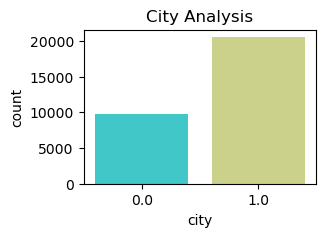

In [9]:
plt.figure(figsize=(3,2))
sns.countplot(x='city', data=df,palette='rainbow')
plt.title('City Analysis')

#### 2. Tire Type

Text(0.5, 1.0, 'Tire Type Analysis')

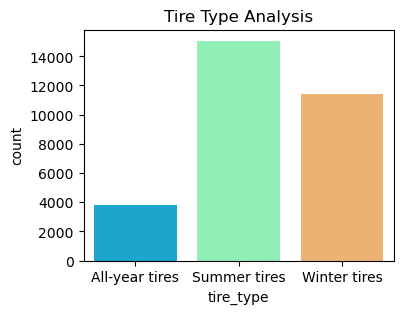

In [45]:
plt.figure(figsize=(4,3))
sns.countplot(x='tire_type', data=df,palette='rainbow')
plt.title('Tire Type Analysis')


### Motor way


Text(0.5, 1.0, 'Motor_way Analysis')

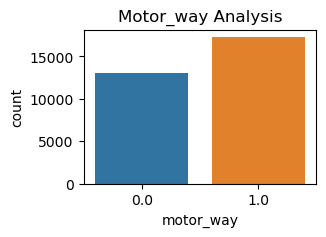

In [42]:
plt.figure(figsize=(3,2))
sns.countplot(x='motor_way', data=df)
plt.title('Motor_way Analysis')

#### Country_roads

Text(0.5, 1.0, 'Country_roads Analysis')

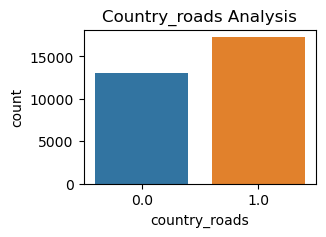

In [44]:
plt.figure(figsize=(3,2))
sns.countplot(x='country_roads', data=df)
plt.title('Country_roads Analysis')


#### Driving_style

Text(0.5, 1.0, 'Driving_style Analysis')

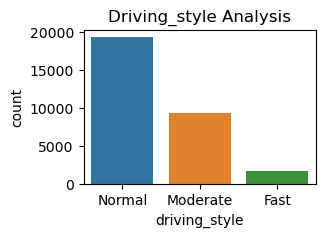

In [46]:
plt.figure(figsize=(3,2))
sns.countplot(x='driving_style', data=df)
plt.title('Driving_style Analysis')


#### AC 

Text(0.5, 1.0, 'A/C Analysis')

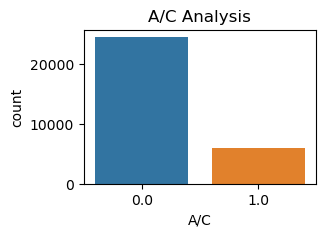

In [47]:
plt.figure(figsize=(3,2))
sns.countplot(x='A/C', data=df)
plt.title('A/C Analysis')
'A/C','park_heating'

#### Park Heating 

Text(0.5, 1.0, 'Park_heating Analysis')

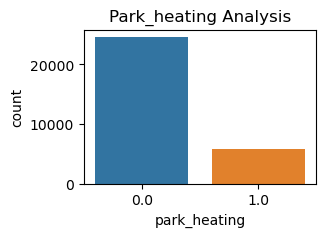

In [48]:
plt.figure(figsize=(3,2))
sns.countplot(x='park_heating', data=df)
plt.title('Park_heating Analysis')


### Numerical 

In [40]:
numeric_cols=['power(kW)','odometer','quantity(kWh)','consumption(kWh/100km)','ecr_deviation','trip_distance(km)']

#### Power 

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

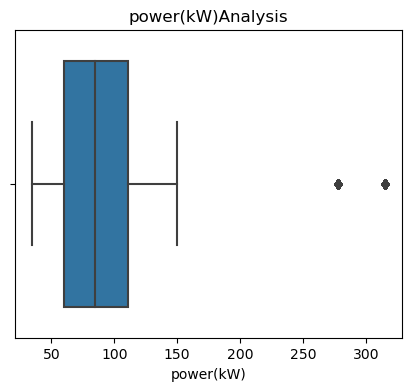

In [55]:
plt.figure(figsize=(5,4))
sns.boxplot(x='power(kW)', data=df)
plt.title('power(kW)Analysis')
plt.xticks()


#### Quantity

Text(0.5, 1.0, 'quantity(kWh)')

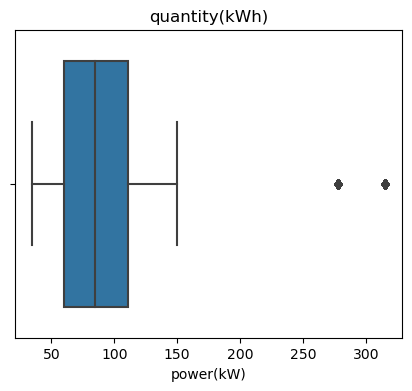

In [53]:
plt.figure(figsize=(5,4))
sns.boxplot(x='power(kW)', data=df)
plt.title('quantity(kWh)')


#### Consumption

(0.0, 150.0)

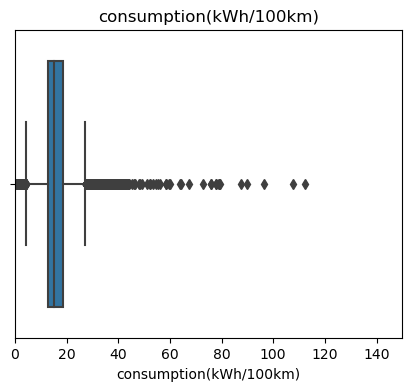

In [59]:
plt.figure(figsize=(5,4))
sns.boxplot(x='consumption(kWh/100km)', data=df)
plt.title('consumption(kWh/100km)')
plt.xlim([0, 150])



In [10]:
d=df[df['consumption(kWh/100km)']<=10]

In [68]:
d[['trip_distance(km)','power(kW)','consumption(kWh/100km)']].head()

,trip_distance(km),power(kW),consumption(kWh/100km)
123,117.0,100.0,7.69
582,117.0,100.0,7.69
683,36.0,100.0,8.65
684,130.0,100.0,8.65
685,116.0,100.0,8.65


ECR_Deviation

(-20.0, 100.0)

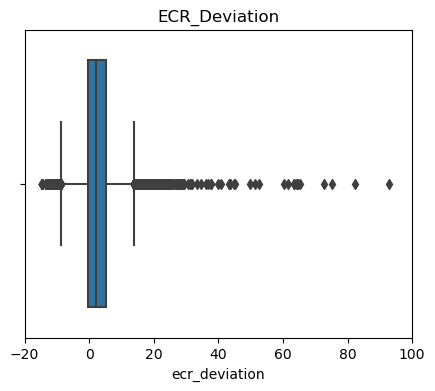

In [73]:
plt.figure(figsize=(5,4))
sns.boxplot(x='ecr_deviation', data=df)
plt.title('ECR_Deviation')
plt.xlim([-20, 100])

#### Target Variable    
Trip_distance(km)

(0.0, 1000.0)

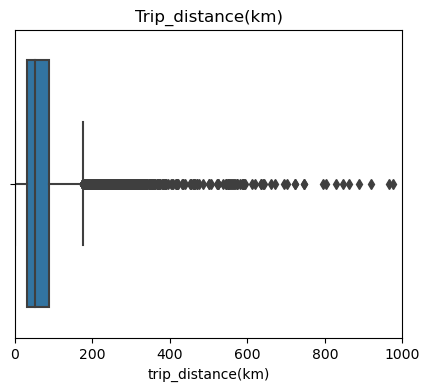

In [77]:
plt.figure(figsize=(5,4))
sns.boxplot(x='trip_distance(km)', data=df)
plt.title('Trip_distance(km)')
plt.xlim([0, 1000])

### Bi Variate Analysis

#### Range versus Tire Type

(-20.0, 1000.0)

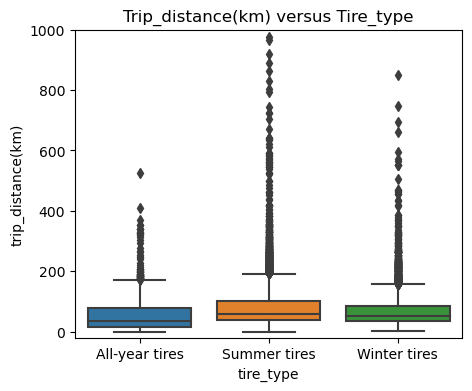

In [81]:
plt.figure(figsize=(5,4))
sns.boxplot(y='trip_distance(km)', x='tire_type', data=df)
plt.title('Trip_distance(km) versus Tire_type')
plt.ylim([-20, 1000])

#### Range versus city


(-20.0, 1000.0)

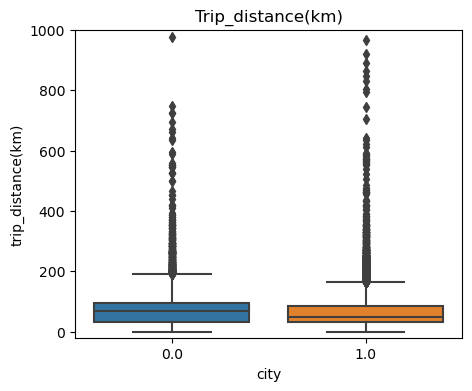

In [82]:
plt.figure(figsize=(5,4))
sns.boxplot(y='trip_distance(km)', x='city', data=df)
plt.title('Trip_distance(km)')
plt.ylim([-20, 1000])

#### Range Versus Motor way 

(-20.0, 1000.0)

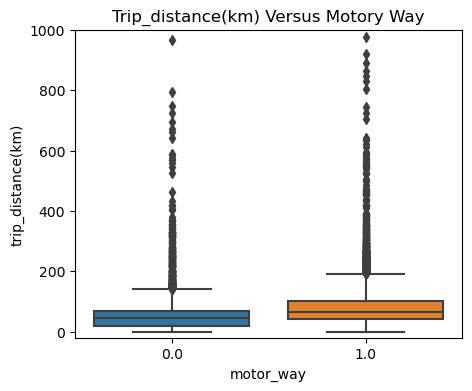

In [83]:
plt.figure(figsize=(5,4))
sns.boxplot(y='trip_distance(km)', x='motor_way', data=df)
plt.title('Trip_distance(km) Versus Motory Way')
plt.ylim([-20, 1000])

#### Range versus 

(-20.0, 1000.0)

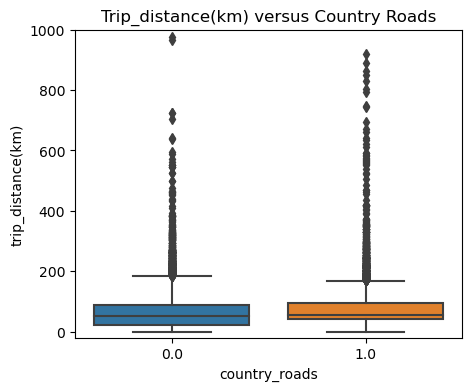

In [86]:
plt.figure(figsize=(5,4))
sns.boxplot(y='trip_distance(km)', x='country_roads', data=df)
plt.title('Trip_distance(km) versus Country Roads')
plt.ylim([-20, 1000])

#### Range Versus Sriving Style 

(-20.0, 1000.0)

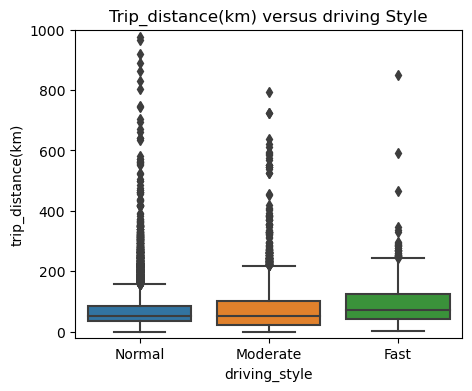

In [88]:
plt.figure(figsize=(5,4))
sns.boxplot(y='trip_distance(km)', x='driving_style', data=df)
plt.title('Trip_distance(km) versus driving Style')
plt.ylim([-20, 1000])

#### Range versus AC 

(-20.0, 1000.0)

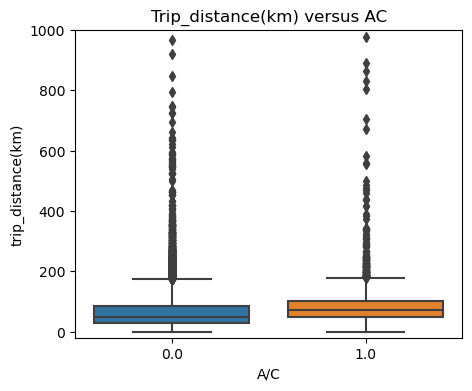

In [89]:
plt.figure(figsize=(5,4))
sns.boxplot(y='trip_distance(km)', x='A/C', data=df)
plt.title('Trip_distance(km) versus AC')
plt.ylim([-20, 1000])

#### Range Versus Park Heating 

(-20.0, 1000.0)

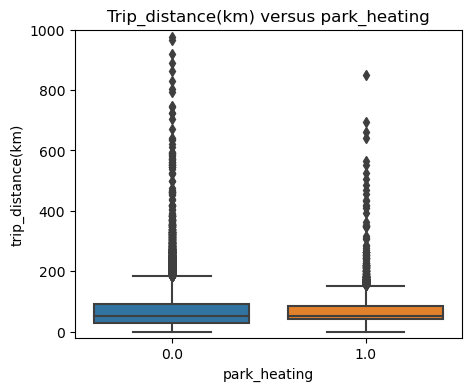

In [90]:
plt.figure(figsize=(5,4))
sns.boxplot(y='trip_distance(km)', x='park_heating', data=df)
plt.title('Trip_distance(km) versus park_heating')
plt.ylim([-20, 1000])

From Bi Variate Analysis it's found that A/C doesn't impact Range and can be dropped 

## Multivariate Analysis

#### Correlation

Text(0.5, 1.0, 'Correlation matrix')

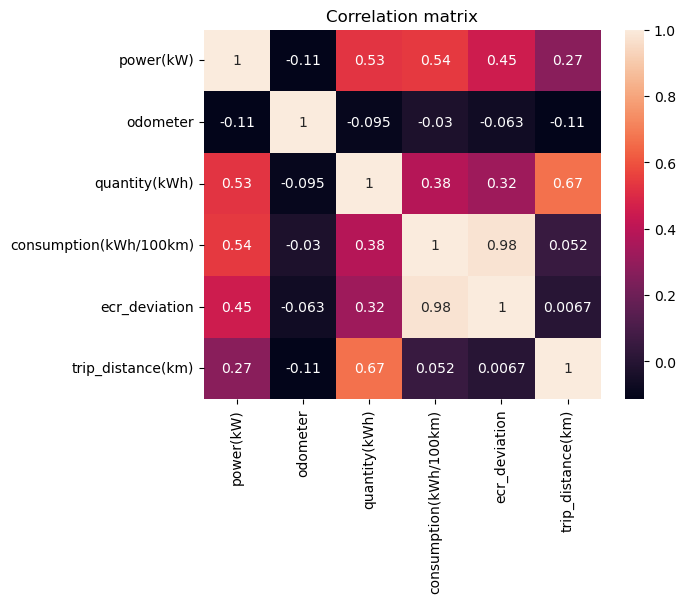

In [41]:
corr_mat=df[numeric_cols].corr()
sns.heatmap(
    data=corr_mat,annot = True)
plt.title('Correlation matrix')

#### Multicollinearity with VIF

In [6]:
final_list=numeric_cols+categorical
final_list

['power(kW)',
 'odometer',
 'quantity(kWh)',
 'consumption(kWh/100km)',
 'ecr_deviation',
 'trip_distance(km)',
 'fuel_type',
 'tire_type',
 'city',
 'motor_way',
 'country_roads',
 'driving_style',
 'A/C',
 'park_heating']

In [8]:
X=data[final_list]

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31736 entries, 13 to 31748
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               31734 non-null  float64
 1   odometer                23452 non-null  float64
 2   quantity(kWh)           31734 non-null  float64
 3   consumption(kWh/100km)  31634 non-null  float64
 4   ecr_deviation           27573 non-null  float64
 5   trip_distance(km)       31734 non-null  float64
 6   fuel_type               31736 non-null  object 
 7   tire_type               31646 non-null  object 
 8   city                    31734 non-null  object 
 9   motor_way               31734 non-null  object 
 10  country_roads           31734 non-null  object 
 11  driving_style           31625 non-null  object 
 12  A/C                     31734 non-null  object 
 13  park_heating            31734 non-null  object 
dtypes: float64(6), object(8)
memory usage

In [ ]:
X.drop(columns="fuel_type", inplace=True)

In [17]:
X['driving_style'].unique()

array(['Normal', 'driving_style', nan, 'Moderate', 'Fast'], dtype=object)

In [48]:
X.loc[:,'tire_type']=mul_d['tire_type'].map({'All-year tires':1,'Summer tires':3,'Winter tires':2, 'tire_type':0})

In [20]:
X.loc[:,'driving_style']=X['driving_style'].map({'Fast':1,'Moderate':2,'Normal':3})

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [23]:
X.dropna(inplace=True)

/usr/lib/python3/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [24]:
X=X[(X['driving_style']!='driving_style') & X['tire_type']!='tire_type']

In [25]:
X.head()

,power(kW),odometer,quantity(kWh),consumption(kWh/100km),ecr_deviation,trip_distance(km),tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating
1386,315.0,130484.0,25.40,20.85,6.05,1.0,3.0,1.0,1.0,0.0,2.0,0.0,0.0
1387,315.0,130483.0,4.95,20.85,6.05,12.0,3.0,1.0,1.0,0.0,2.0,0.0,0.0
1388,315.0,130471.0,6.60,20.85,6.05,127.0,3.0,1.0,1.0,0.0,2.0,0.0,0.0
1389,315.0,130344.0,28.10,20.85,6.05,172.0,3.0,1.0,1.0,0.0,2.0,0.0,0.0
1390,315.0,130172.0,11.94,22.93,8.13,28.0,3.0,1.0,1.0,0.0,2.0,0.0,0.0


In [26]:
def convert_to_numeric(columns, df):
    for col in columns:
        df[col]=pd.to_numeric(df[col], errors='coerce')
    return df
        
colums_for_num_cov=['power(kW)','quantity(kWh)','consumption(kWh/100km)','trip_distance(km)','ecr_deviation','odometer']
X=convert_to_numeric(X.columns, X) 

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20490 entries, 1386 to 31748
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               20490 non-null  float64
 1   odometer                20490 non-null  float64
 2   quantity(kWh)           20490 non-null  float64
 3   consumption(kWh/100km)  20490 non-null  float64
 4   ecr_deviation           20490 non-null  float64
 5   trip_distance(km)       20490 non-null  float64
 6   tire_type               20490 non-null  float64
 7   city                    20490 non-null  float64
 8   motor_way               20490 non-null  float64
 9   country_roads           20490 non-null  float64
 10  driving_style           20490 non-null  float64
 11  A/C                     20490 non-null  float64
 12  park_heating            20490 non-null  float64
dtypes: float64(13)
memory usage: 2.2 MB


In [40]:
X.drop(columns='trip_distance(km)', inplace=True, axis=1)

In [41]:
X.columns

Index(['power(kW)', 'odometer', 'quantity(kWh)', 'consumption(kWh/100km)',
       'ecr_deviation', 'tire_type', 'city', 'motor_way', 'country_roads',
       'driving_style', 'A/C', 'park_heating'],
      dtype='object')

In [44]:
v=pd.DataFrame()

In [45]:
v['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  

In [46]:
v['columns']=X.columns

In [47]:
v.head(20)

,VIF,columns
0,7.576556,power(kW)
1,4.033480,odometer
2,3.662185,quantity(kWh)
3,91.420979,consumption(kWh/100km)
4,14.163980,ecr_deviation
5,25.068447,tire_type
6,6.172141,city
7,2.853941,motor_way
8,3.685182,country_roads
9,17.239367,driving_style


From above analysis , it shows that consumption has VIF of 91.42 and can be dropped 